# Accessibility to Public Services: Ecuador Case

In [10]:
import geopandas as gpd #Para archivos .shp 
import matplotlib.pyplot as plt #Para gráficar 
#Se define el tamaño de salidad de las gráficas

import numpy as np 
import pandas as pd

from shapely import wkt
import geopy.distance
from math import radians, cos, sin, asin, sqrt

from pandas.core.frame import DataFrame
from functools import reduce
import pyproj as pp
from pyproj import Proj


from pylab import rcParams 
rcParams['figure.figsize'] = 12,12

import warnings
warnings.filterwarnings('ignore')

## Distance between beneficiaries of non-contributory monetary transfers and social services center.

In [2]:
#Database from MIES

# BDH and others pensions 
df_1 = pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2022/BENEFICIARIOS_BONOS_PENSIONES_JUL2022.xls", sheet_name= "PARTE 1 JULIO2022",dtype={'dpa_provin': str})
df_2 = pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2022/BENEFICIARIOS_BONOS_PENSIONES_JUL2022.xls", sheet_name= "PARTE 2 JULIO2022")
df_MIES = pd.concat([df_1, df_2], ignore_index=True)


df_ben = df_MIES.groupby(['dpa_despro','beneficio'])['beneficio'].count().reset_index(name='Total_beneficiarios')
df_ben




,dpa_despro,beneficio,Total_beneficiarios
0,AZUAY,BONO 1000 DÍAS,352
1,AZUAY,BONO DE DESARROLLO HUMANO,22649
2,AZUAY,BONO DE DESARROLLO HUMANO CON COMPONENTE VARIABLE,6423
3,AZUAY,BONO JOAQUIN GALLEGOS LARA,1077
4,AZUAY,PENSION MIS MEJORES AÑOS,11233
...,...,...,...
162,ZONA EN ESTUDIO,BONO 1000 DÍAS,1
163,ZONA EN ESTUDIO,BONO DE DESARROLLO HUMANO,45
164,ZONA EN ESTUDIO,BONO DE DESARROLLO HUMANO CON COMPONENTE VARIABLE,13
165,ZONA EN ESTUDIO,PENSION MIS MEJORES AÑOS,27


<AxesSubplot:>

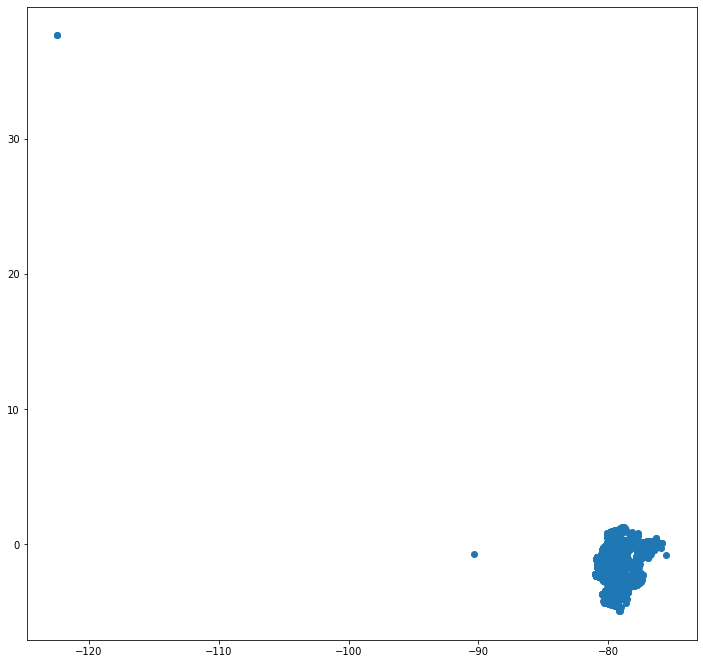

In [3]:
# Convert  MIES´s Database to spatial format "EPSG:4326"

df_MIES_gdf= gpd.GeoDataFrame(df_MIES, geometry= gpd.points_from_xy(df_MIES['lon'],df_MIES['lat']))
df_MIES_gdf['geometry'] = df_MIES_gdf['geometry'].astype(str).apply(wkt.loads)
gdf_hog = gpd.GeoDataFrame(df_MIES_gdf)

gdf_hog = gdf_hog.set_crs("EPSG:4326")
gdf_hog.plot()

Because the MIES points have wrong geographical points (points that are outside Ecuador), the following steps are performed:

1. The shapefile of the provinces of Ecuador is loaded and converted into the 4326 format (same geographic format as the MIES base)

In [21]:
df_prov= gpd.read_file("../data/Ecuador_provincias/ecuador.shp", encoding="ISO-8859-1") #Se lee la base de datos .Shp
df_prov = df_prov.to_crs("EPSG:4326")

Error in sys.excepthook:
Traceback (most recent call last):
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'UnicodeDecodeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPython\core\ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPython\core\ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPyt

2. Interception between beneficiaries of non-contributory monetary transfers and ecuadorian provinces shapefile.


In [5]:
df_final = gpd.sjoin(gdf_hog,df_prov,how='left')
df_final.head(2)

,zp,ud_mies,dpa_provin,dpa_despro,dpa_cant,dpa_descan,dpa_parroq,dpa_despar,beneficio,edad,...,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area
0,Zona Planificación 6,UNIDAD DESCONCENTRADA ZONAL 6,1,AZUAY,108,SANTA ISABEL,10851,ABDON CALDERON (LA UNION),PENSION MIS MEJORES AÑOS,73.0,...,1.0,01,AZUAY,0.0,2010,05,01,593,679651.580798,8.325642e+09
1,Zona Planificación 6,UNIDAD DESCONCENTRADA ZONAL 6,1,AZUAY,101,CUENCA,10150,CUENCA,PENSION PARA ADULTOS MAYORES,81.0,...,1.0,01,AZUAY,0.0,2010,05,01,593,679651.580798,8.325642e+09


3. The points that are outside of Ecuador are eliminated

<AxesSubplot:>

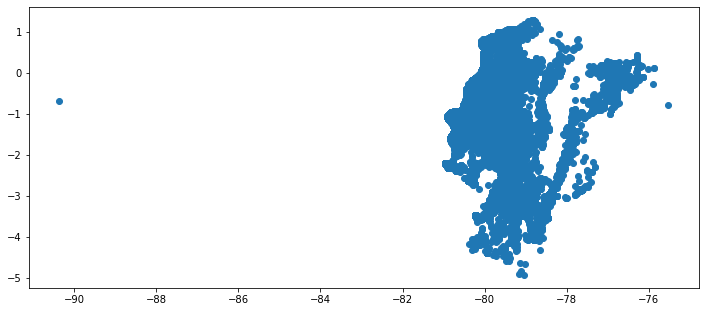

In [6]:
df_final.dropna(subset=['DPA_DESPRO'], inplace = True )
df_final.plot()

In [7]:
df_final = df_final[['ud_mies','DPA_PROVIN','DPA_DESPRO','beneficio','edad','geometry']]

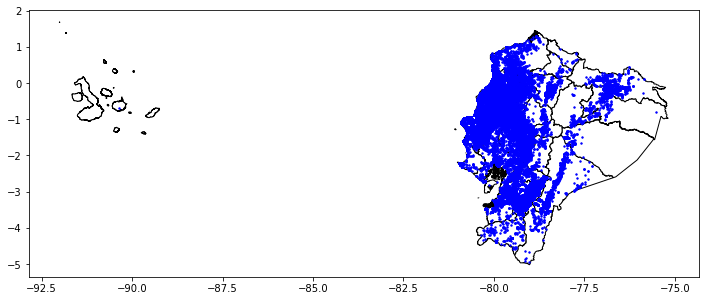

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

df_prov.plot(ax=ax, color='white', edgecolor='black')
df_final.plot(ax=ax, marker='o', color='blue', markersize=2)

plt.show()

# Social services center. 



In [39]:
#Database from MIES
#Ubicación de los centros de MIES
df_mies_c= pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2022/UNIDADES_INCLUSION_SOCIAL_JUL2022.xls")

In [40]:
#Reproj
projWGS84 = Proj(init="EPSG:32733",zone=17,ellps='WGS84', preserve_units=False)
df_mies_c[['wgs_x', 'wgs_y']] = df_mies_c.apply(lambda row:projWGS84(row['x'], row['y'], inverse=True), axis=1).apply(pd.Series)


In [41]:
df_MIES_c_gdf= gpd.GeoDataFrame(df_mies_c, geometry= gpd.points_from_xy(df_mies['wgs_x'],df_mies['wgs_y']))
df_MIES_c_gdf['geometry'] = df_MIES_c_gdf['geometry'].astype(str).apply(wkt.loads)
df_MIES_c_gdf = gpd.GeoDataFrame(df_MIES_c_gdf, crs="EPSG:32733")


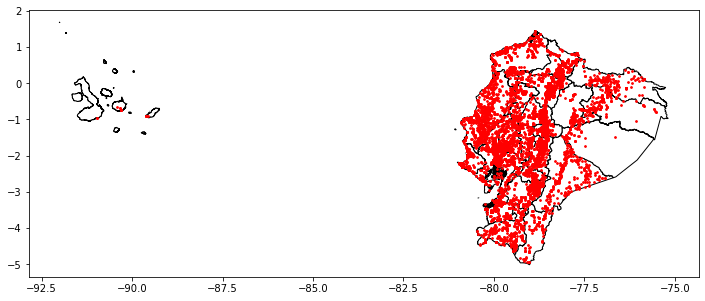

In [46]:


fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

df_prov.plot(ax=ax, color='white', edgecolor='black')
df_MIES_c_gdf.plot(ax=ax, marker='o', color='red', markersize=3)

plt.show()

